In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
df = pd.read_csv('/Users/ryand/pyprojects/Chicago Transit Crime/Crimes_-_2001_to_present.csv')
stations = pd.read_csv('/Users/ryand/pyprojects/Chicago Transit Crime/CTARailStations.csv')

In [75]:
df['sort'] = np.random.rand(len(df['Latitude']))
df = df[df['Latitude'] > 40]
sample = df.sort_values('sort')[::800]

In [51]:
sample = sample[sample['Latitude'] > 40]

In [231]:
perc_samp = 1

narrow =[
#     'ASSAULT',
#     'BATTERY',
#     'CRIMINAL DAMAGE',
    'HOMICIDE',
#     'NARCOTICS',
#     'PROSTITUTION',
#     'THEFT',
#     'WEAPONS VIOLATION',
#     'CRIMINAL TRESPASS'
]
df_n = df[(df['Primary Type'].isin(narrow)) 
#           & (df['Year'].isin([2012,2013,2014,2015,2016]))
         ]
df_n = df_n[::int(len(df_n)/(len(df_n)*perc_samp))]

(-87.775, -87.575)

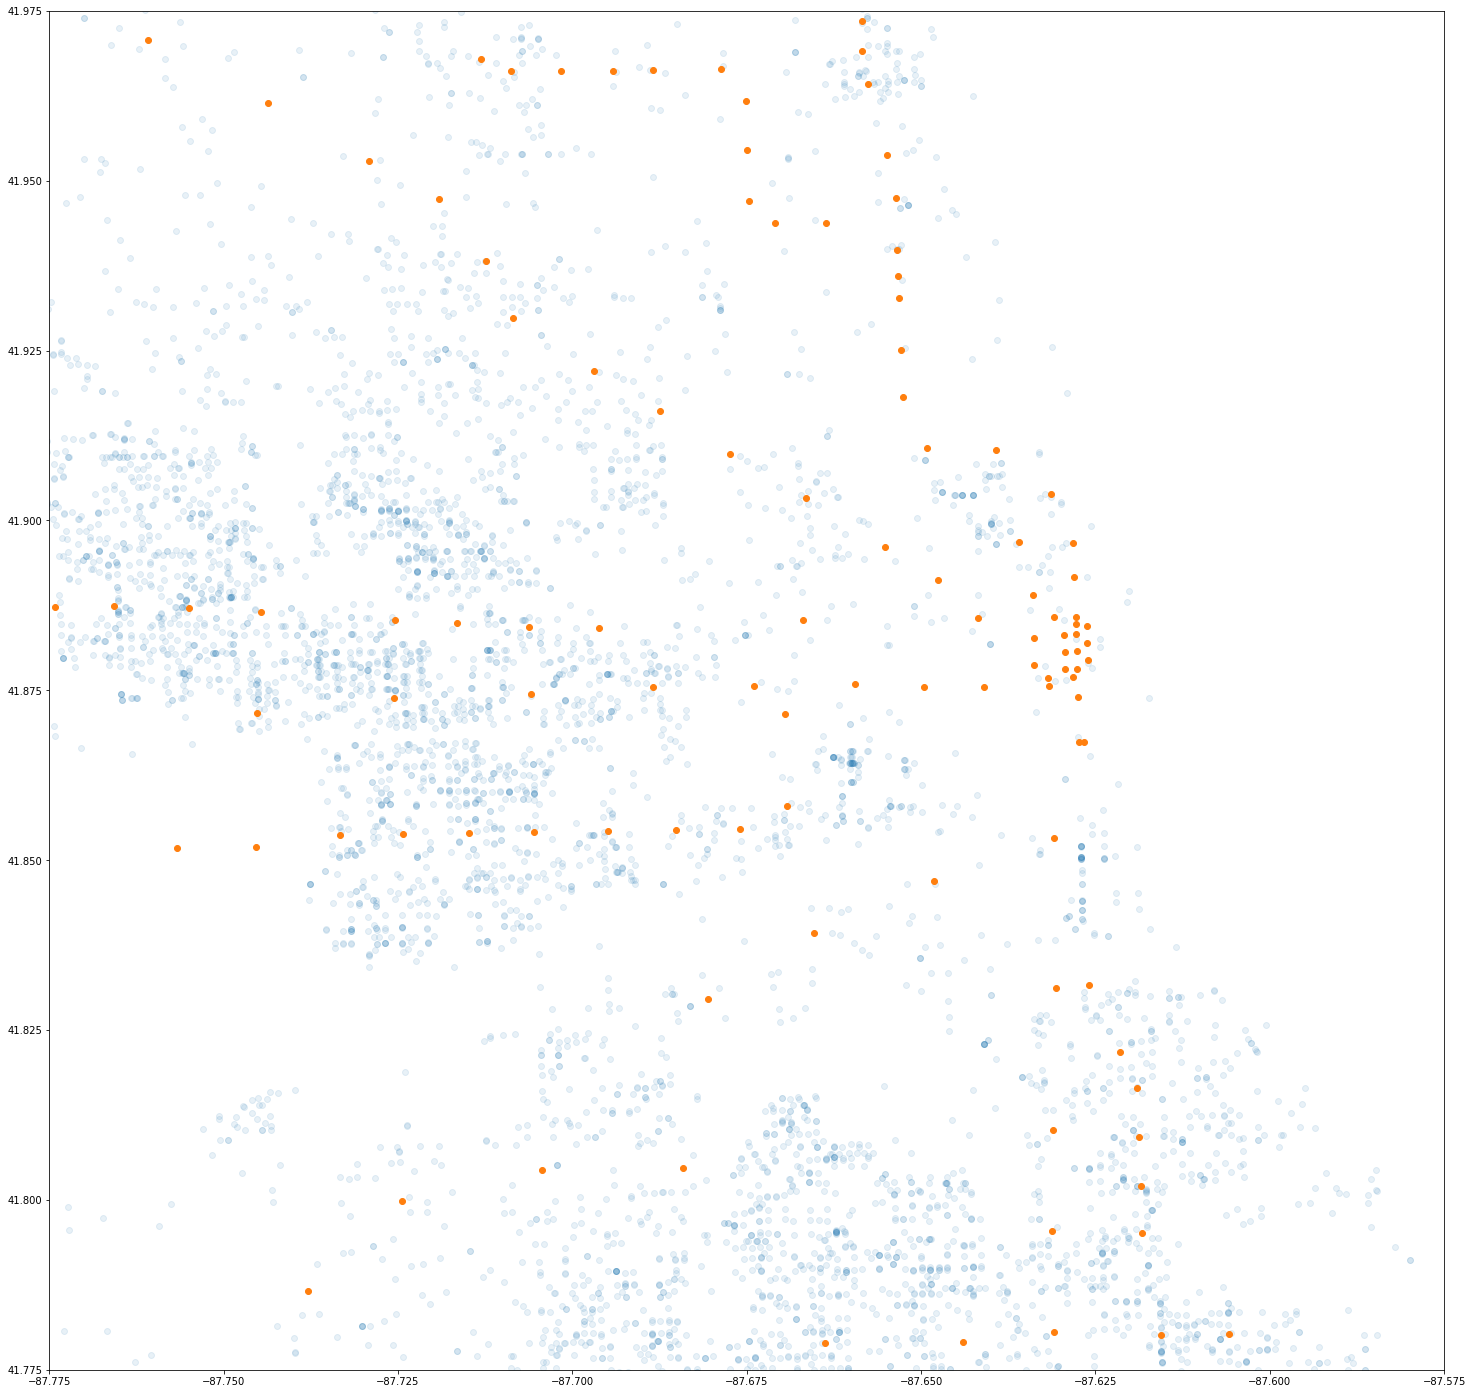

In [235]:
plt.figure(figsize=(25,25))
plt.scatter(df_n['Longitude'], df_n['Latitude'], alpha=.1)
plt.scatter(stations['Longitude'], stations['Latitude'])
y_start = 41.775
x_start = -87.775
geo_size = .20
plt.ylim(y_start,(y_start+geo_size))
plt.xlim(x_start,(x_start+geo_size))

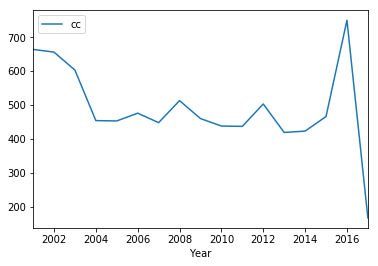

In [228]:
df[df['Primary Type'] == 'HOMICIDE'].groupby('Year').sum()[['cc']].plot()

In [161]:
t_crime = df.groupby('Year').sum()[['cc']]

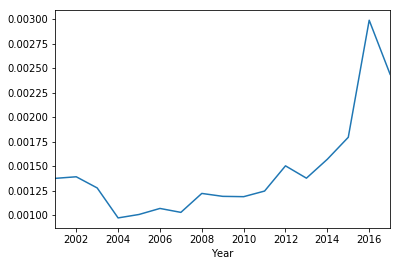

In [225]:
thinking = df[df['Primary Type'] == 'HOMICIDE'].groupby('Year').sum()[['cc']]
thinking = thinking.join(t_crime,lsuffix='_unique', rsuffix='_total')
thinking['per'] = thinking['cc_unique']/thinking['cc_total']
thinking['per'].plot()#CRIMINAL TRESPASS